# U.S. Medical Insurance Costs

## Scope of the Project

This project aims at analyzing a [Kaggle dataset](https://www.kaggle.com/mirichoi0218/insurance) containing information regarding the costs of insurance for various people in various parts of the United States. In what follows, I aim at:

1. analyzing the available data, providing basic information concerning percentages and distribution;
2. answering questions about how sex and geographical context may affect one's lifestyle and insurance costs.

An immediately evident challenge for this project is the complexity of the data and the mulltiple factors that affect the costs of insurance; **how can I examine the impact of a single variable (say, sex or geographical location) without taking into account everything else?**

### Importing the dataset into Python

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

df = pd.read_csv("insurance.csv")
print(df.head())
df.head()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Preliminary analysis of the dataset

I will start by creating different arrays for the numerical values in the dataset:

1. age
2. BMI
3. number of children
4. insurance charges.

In [2]:
age = df["age"]

bmi = df["bmi"]
children = df["children"]

charges = df["charges"]

Now I will analyze some of this data, starting with the numerical values (charges, age, bmi, number of children).


 **Individual medical costs billed by health insurance**
 
        The mean of this array is 13270.422265141257.
        This is the five-number summary for this array:
            - sample minimum: 1121.8739,
            - first quartile: 4740.28715,
            - median: 9382.033,
            - third quartile: 16639.912515,
            - sample maximum: 63770.42801.
        The interquartile range for this array is 11899.625365.
        The standard deviation is 12105.484975561612.
        The variance is 146542766.49354792.
        


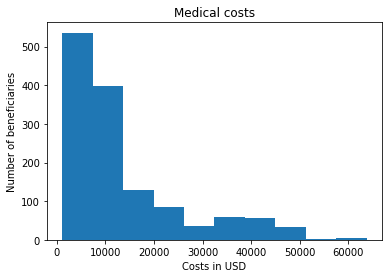


 **Age of primary beneficiary** 
 
        The mean of this array is 39.20702541106129.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 27.0,
            - median: 39.0,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 24.0.
        The standard deviation is 14.044709038954522.
        The variance is 197.2538519888909.
        


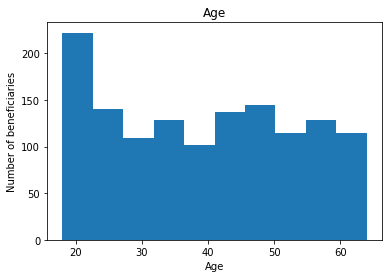

In [3]:
def essential_array_analysis(array):
    return (
        """
        The mean of this array is {mean}.
        This is the five-number summary for this array:
            - sample minimum: {sample_minimum},
            - first quartile: {first_quartile},
            - median: {median},
            - third quartile: {third_quartile},
            - sample maximum: {sample_maximum}.
        The interquartile range for this array is {interquartile_range}.
        The standard deviation is {standard_deviation}.
        The variance is {variance}.
        """.format(
        mean = np.mean(array),
        sample_minimum = min(array),
        first_quartile = np.percentile(array, 25),
        median = np.median(array),
        third_quartile = np.percentile(array, 75),
        sample_maximum = max(array),
        interquartile_range = (np.percentile(array, 75) - np.percentile(array, 25)),
        standard_deviation = np.std(array),
        variance = np.var(array)
        ))

print("\n **Individual medical costs billed by health insurance**\n", essential_array_analysis(charges))
plt.hist(charges)
plt.title("Medical costs")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.show()
print("\n **Age of primary beneficiary** \n", essential_array_analysis(age))
plt.hist(age)
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Number of beneficiaries")
plt.show()


 **Body mass index** 
 
        The mean of this array is 30.66339686098655.
        This is the five-number summary for this array:
            - sample minimum: 15.96,
            - first quartile: 26.29625,
            - median: 30.4,
            - third quartile: 34.69375,
            - sample maximum: 53.13.
        The interquartile range for this array is 8.3975.
        The standard deviation is 6.0959076415894256.
        The variance is 37.16008997478835.
        


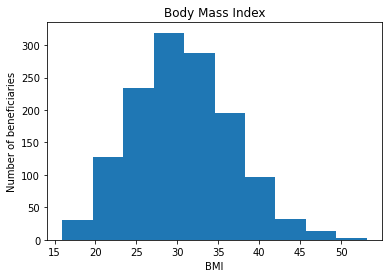


 **Number of children** 
 
        The mean of this array is 1.0949177877429.
        This is the five-number summary for this array:
            - sample minimum: 0,
            - first quartile: 0.0,
            - median: 1.0,
            - third quartile: 2.0,
            - sample maximum: 5.
        The interquartile range for this array is 2.0.
        The standard deviation is 1.2050421724928497.
        The variance is 1.452126637486287.
        


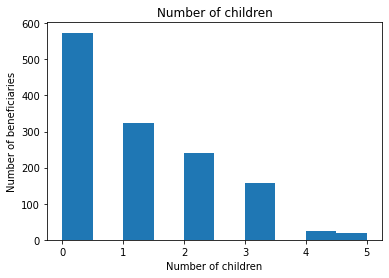

In [4]:
print("\n **Body mass index** \n", essential_array_analysis(bmi))
plt.hist(bmi)
plt.title("Body Mass Index")
plt.xlabel("BMI")
plt.ylabel("Number of beneficiaries")
plt.show()
print("\n **Number of children** \n", essential_array_analysis(children))
plt.hist(children)
plt.title("Number of children")
plt.xlabel("Number of children")
plt.ylabel("Number of beneficiaries")
plt.show()

Now I will analyze the categorical values in the dataset (smokers and non-smokers, region of provenance, sex).

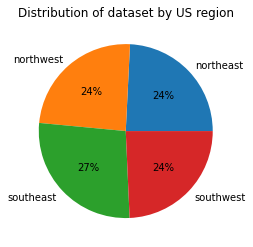

      region  beneficiaries  percentage
0  northeast            324   24.215247
1  northwest            325   24.289985
2  southeast            364   27.204783
3  southwest            325   24.289985


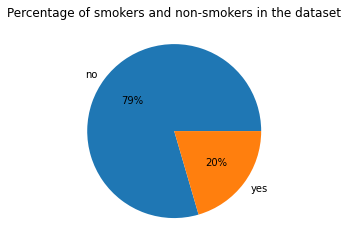

  smoker  beneficiaries  percentage
0     no           1064   79.521674
1    yes            274   20.478326


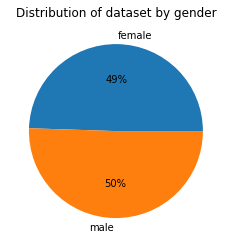

      sex  beneficiaries  percentage
0  female            662   49.476831
1    male            676   50.523169


In [5]:
category = lambda category: \
    df.rename(columns = {"charges": "beneficiaries"}).groupby(category).beneficiaries.count().reset_index()
region = category("region")
plt.pie(region["beneficiaries"], labels = region["region"], autopct = "%d%%")
plt.title("Distribution of dataset by US region")
plt.show()
perc_column = lambda perc_column: (perc_column["beneficiaries"] / df["charges"].count()) * 100
region["percentage"] = perc_column(region)
print(region)
smoker = category("smoker")
plt.pie(smoker["beneficiaries"], labels = smoker["smoker"], autopct = "%d%%")
plt.title("Percentage of smokers and non-smokers in the dataset")
plt.show()
smoker["percentage"] = perc_column(smoker)
print(smoker)
sex = category("sex")
plt.pie(sex["beneficiaries"], labels = sex["sex"], autopct = "%d%%")
plt.title("Distribution of dataset by gender")
plt.show()
sex["percentage"] = perc_column(sex)
print(sex)

### Adding a column for insurance costs tiers
The insurance costs in this dataset tend to be under \\$10,000; few go above \\$15,000; a minimal percentage goes above \\$50,000. To facilitate the next steps of the analysis, I will add another column where the insurance costs are categorized into four tiers:
- below \\$5,000: **low**;
- between \\$5,000 and \\$10,000: **medium**;
- between \\$10,000 and \\$15,000: **high**;
- above \\$15,000: **highest**.

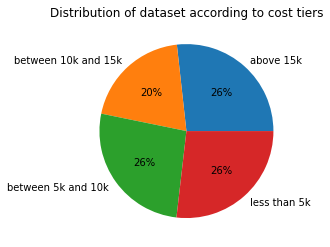

,age,sex,bmi,children,smoker,region,charges,cost tier
0,19,female,27.900,0,yes,southwest,16884.92400,above 15k
1,18,male,33.770,1,no,southeast,1725.55230,less than 5k
2,28,male,33.000,3,no,southeast,4449.46200,less than 5k
3,33,male,22.705,0,no,northwest,21984.47061,above 15k
4,32,male,28.880,0,no,northwest,3866.85520,less than 5k


In [6]:
df["cost tier"] = df.apply(lambda row: "less than 5k" if row["charges"] < 5000 else (
    "between 5k and 10k" if row["charges"] >= 5000 and row["charges"] < 10000 else (
    "between 10k and 15k" if row["charges"] >= 10000 and row["charges"] < 15000 else "above 15k")), axis = 1)

tier = category("cost tier")
plt.pie(tier["beneficiaries"], labels = tier["cost tier"], autopct = "%d%%")
plt.title("Distribution of dataset according to cost tiers")
plt.show()
df.head()

### Additional tables
I will now create additional tables where the data is rearranged according to two particular categories: gender and geographical provenance.

#### Analysis on the basis of gender
I will start with insurance costs.


**Costs for male beneficiaries**
 
        The mean of this array is 13956.751177721893.
        This is the five-number summary for this array:
            - sample minimum: 1121.8739,
            - first quartile: 4619.134,
            - median: 9369.61575,
            - third quartile: 18989.59025,
            - sample maximum: 62592.87309.
        The interquartile range for this array is 14370.456250000001.
        The standard deviation is 12961.428410257226.
        The variance is 167998626.43422315.
        

**Costs for female beneficiaries**
 
        The mean of this array is 12569.578843835347.
        This is the five-number summary for this array:
            - sample minimum: 1607.5101,
            - first quartile: 4885.1587,
            - median: 9412.9625,
            - third quartile: 14454.691825,
            - sample maximum: 63770.42801.
        The interquartile range for this array is 9569.533125.
        The standard deviation is 11120.29525887552.
        Th

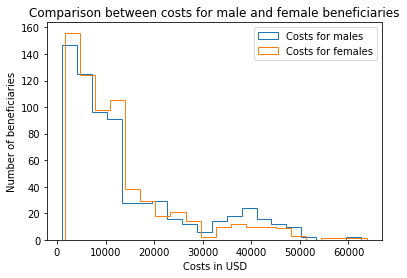

In [7]:
male_costs = df[df.sex == "male"]["charges"]
print("\n**Costs for male beneficiaries**\n", essential_array_analysis(male_costs))
female_costs = df[df.sex == "female"]["charges"]
print("\n**Costs for female beneficiaries**\n", essential_array_analysis(female_costs))
plt.hist(male_costs, bins=20, histtype="step")
plt.hist(female_costs, bins=20, histtype="step")
plt.title("Comparison between costs for male and female beneficiaries")
plt.xlabel("Costs in USD")
plt.ylabel("Number of beneficiaries")
plt.legend(["Costs for males", "Costs for females"])
plt.show()

The two groups have slightly different means: 12569.57 for women, 13956.75 for men. Can we say that this difference is statistically significant? I will perform a Two-Sample T-Test to verify this hypothesis.

In [10]:
def perform_2sample_ttest(group1, group2):
    pval = ttest_ind(group1, group2)[1]
    print("There is a {:.2%} probability that the two groups belong to a population with the same average.".format(pval))
    print("The difference is {maybe}statistically significant.".format(maybe = "" if pval < 0.05 else "not "))
    return pval

pval_sex_costs = perform_2sample_ttest(male_costs, female_costs)

There is a 3.61% probability that the two groups belong to a population with the same average.
The difference is statistically significant.


So, men tend to pay higher insurance costs than women in this dataset. What might be the reason for this difference? Do the men in this dataset tend to smoke more than women? To have higher BMIs? To be older? To have more children? 

Let's start with the age difference. If there is a statistically significant difference in the age distribution for these two groups, then the disparity in costs would be less impressive.


**Age distribution for men in the dataset**
 
        The mean of this array is 38.917159763313606.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 26.0,
            - median: 39.0,
            - third quartile: 51.0,
            - sample maximum: 64.
        The interquartile range for this array is 25.0.
        The standard deviation is 14.039744985943786.
        The variance is 197.11443927033366.
        

**Age distribution for women in the dataset**
 
        The mean of this array is 39.503021148036254.
        This is the five-number summary for this array:
            - sample minimum: 18,
            - first quartile: 27.0,
            - median: 40.0,
            - third quartile: 51.75,
            - sample maximum: 64.
        The interquartile range for this array is 24.75.
        The standard deviation is 14.043603545398817.
        The variance is 197.22280054033823.
        
There is a 44.59% pr

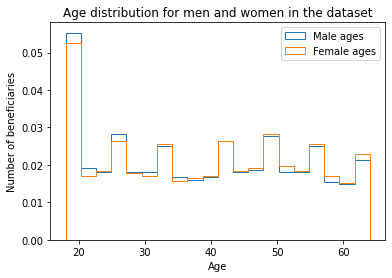

In [17]:
male_age = df[df.sex == "male"]["age"]
print("\n**Age distribution for men in the dataset**\n", essential_array_analysis(male_age))
female_age = df[df.sex == "female"]["age"]
print("\n**Age distribution for women in the dataset**\n", essential_array_analysis(female_age))
pval_sex_age = perform_2sample_ttest(male_age, female_age)
plt.hist(male_age, bins=20, histtype="step", density=True)
plt.hist(female_age, bins=20, histtype="step", density=True)
plt.title("Age distribution for men and women in the dataset")
plt.legend(["Male ages", "Female ages"])
plt.xlabel("Age")
plt.ylabel("Number of beneficiaries")
plt.show()

So, the ages for the two groups are roughly the same; the differences between the two datasets from this standpoint do not appear to be statistically significant. What about the BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index))?


**Distribution of BMI values for men in the dataset**
 
        The mean of this array is 30.943128698224854.
        This is the five-number summary for this array:
            - sample minimum: 15.96,
            - first quartile: 26.41,
            - median: 30.6875,
            - third quartile: 34.9925,
            - sample maximum: 53.13.
        The interquartile range for this array is 8.5825.
        The standard deviation is 6.13589119333087.
        The variance is 37.64916073639534.
        

**Distribution of BMI values for women in the dataset**
 
        The mean of this array is 30.37774924471299.
        This is the five-number summary for this array:
            - sample minimum: 16.815,
            - first quartile: 26.125,
            - median: 30.1075,
            - third quartile: 34.31375,
            - sample maximum: 48.07.
        The interquartile range for this array is 8.188749999999999.
        The standard deviation is 6.041454877245921.
        The vari

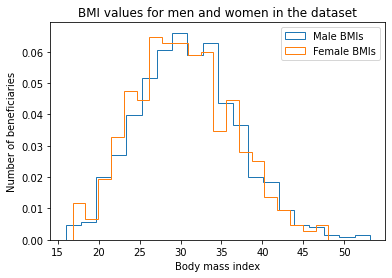

In [16]:
male_bmi = df[df.sex == "male"]["bmi"]
print("\n**Distribution of BMI values for men in the dataset**\n", essential_array_analysis(male_bmi))
female_bmi = df[df.sex == "female"]["bmi"]
print("\n**Distribution of BMI values for women in the dataset**\n", essential_array_analysis(female_bmi))
pval_sex_bmi = perform_2sample_ttest(male_bmi, female_bmi)
plt.hist(male_bmi, bins=20, histtype="step", density=True)
plt.hist(female_bmi, bins=20, histtype="step", density=True)
plt.title("BMI values for men and women in the dataset")
plt.legend(["Male BMIs", "Female BMIs"])
plt.xlabel("Body mass index")
plt.ylabel("Number of beneficiaries")
plt.show()

The difference in the BMI values is little, and does not seem to be statistically significant. What about the percentage of smokers vs. non-smokers?

In [22]:
print(df.head())

   age     sex     bmi  children smoker     region      charges     cost tier
0   19  female  27.900         0    yes  southwest  16884.92400     above 15k
1   18    male  33.770         1     no  southeast   1725.55230  less than 5k
2   28    male  33.000         3     no  southeast   4449.46200  less than 5k
3   33    male  22.705         0     no  northwest  21984.47061     above 15k
4   32    male  28.880         0     no  northwest   3866.85520  less than 5k


smoker     sex   no  yes  percentage
0       female  547  115   17.371601
1         male  517  159   23.520710


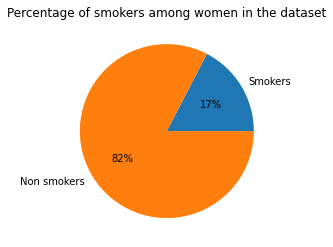

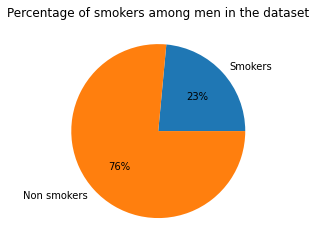

In [85]:
sex_smokers = df.groupby(["sex", "smoker"]).charges.count().reset_index()
sex_smokers = sex_smokers.pivot(index = "sex", columns = "smoker", values = "charges").reset_index()
sex_smokers["percentage"] = (sex_smokers["yes"] / (sex_smokers["no"] + sex_smokers["yes"])) * 100
print(sex_smokers)
plt.pie(sex_smokers.loc[sex_smokers["sex"] == "female", ["yes", "no"]].values.tolist()[0],
       labels = ["Smokers", "Non smokers"], autopct = "%d%%")
plt.title("Percentage of smokers among women in the dataset")
plt.show()
plt.pie(sex_smokers.loc[sex_smokers["sex"] == "male", ["yes", "no"]].values.tolist()[0],
        labels = ["Smokers", "Non smokers"], autopct = "%d%%")
plt.title("Percentage of smokers among men in the dataset")
plt.show()

There seems to be a substantial difference in the ratio of smokers and non smokers between men and women. Is this difference statistically significant? I will perform a Chi Square Test to figure it out.

In [87]:
smoker_sex_contingency = [
    sex_smokers.loc[sex_smokers["sex"] == "male", ["yes", "no"]].values.tolist()[0],
    sex_smokers.loc[sex_smokers["sex"] == "female", ["yes", "no"]].values.tolist()[0]
]

def perform_chi2_test(contingency_table):
    pval = chi2_contingency(contingency_table)[1]
    print("There is a {:.2%} probability that the two groups belong to a population with the same distribution.".format(pval))
    print("The difference is {maybe}statistically significant.".format(maybe = "" if pval < 0.05 else "not "))
    return pval

smoker_sex_pval = perform_chi2_test(smoker_sex_contingency)

There is a 0.65% probability that the two groups belong to a population with the same distribution.
The difference is statistically significant.
